# Import libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


In [20]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [3]:
# Define the generator model
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

In [4]:
# Define the discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [5]:
# Hyperparameters
latent_dim = 100
data_dim = 28 * 28  # For MNIST dataset
batch_size = 64
epochs = 100

In [6]:
# Prepare data loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [8]:
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████| 9912422/9912422 [00:02<00:00, 3850936.46it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████| 28881/28881 [00:00<00:00, 106127.93it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 1648877/1648877 [00:02<00:00, 554653.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 1032325.17it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [9]:
dataloader = torch.utils.data.DataLoader(mnist, batch_size=batch_size, shuffle=True)


In [10]:
# Initialize models
generator = Generator(input_dim=latent_dim, output_dim=data_dim)
discriminator = Discriminator(input_dim=data_dim)


In [11]:
# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

In [12]:
# Loss function
adversarial_loss = nn.BCELoss()


In [13]:
# Training loop
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(dataloader):
        # Ground truths
        valid = torch.ones(imgs.size(0), 1)
        fake = torch.zeros(imgs.size(0), 1)
        
        # Configure input
        real_imgs = imgs.view(imgs.size(0), -1)

        # Train Generator
        optimizer_G.zero_grad()
        
        z = torch.randn(imgs.size(0), latent_dim)
        generated_imgs = generator(z)
        
        g_loss = adversarial_loss(discriminator(generated_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(generated_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        
        d_loss.backward()
        optimizer_D.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch [{i}/{len(dataloader)}] Loss D: {d_loss.item()}, Loss G: {g_loss.item()}")

Epoch [0/100] Batch [0/938] Loss D: 0.6906535029411316, Loss G: 0.6734136939048767
Epoch [0/100] Batch [100/938] Loss D: 0.1192578673362732, Loss G: 1.7150150537490845
Epoch [0/100] Batch [200/938] Loss D: 0.014445341192185879, Loss G: 3.930044651031494
Epoch [0/100] Batch [300/938] Loss D: 0.17175723612308502, Loss G: 1.4098234176635742
Epoch [0/100] Batch [400/938] Loss D: 0.08944101631641388, Loss G: 3.1957383155822754
Epoch [0/100] Batch [500/938] Loss D: 0.021530980244278908, Loss G: 3.8035874366760254
Epoch [0/100] Batch [600/938] Loss D: 0.009989216923713684, Loss G: 4.40635871887207
Epoch [0/100] Batch [700/938] Loss D: 0.03050389140844345, Loss G: 3.36167573928833
Epoch [0/100] Batch [800/938] Loss D: 0.01080593653023243, Loss G: 6.034729957580566
Epoch [0/100] Batch [900/938] Loss D: 0.030257249251008034, Loss G: 5.555837154388428
Epoch [1/100] Batch [0/938] Loss D: 0.07753710448741913, Loss G: 4.510988235473633
Epoch [1/100] Batch [100/938] Loss D: 0.05380475893616676, Loss 

Epoch [9/100] Batch [700/938] Loss D: 0.22610023617744446, Loss G: 4.334964752197266
Epoch [9/100] Batch [800/938] Loss D: 0.024952944368124008, Loss G: 4.0392537117004395
Epoch [9/100] Batch [900/938] Loss D: 0.0812133178114891, Loss G: 3.719083547592163
Epoch [10/100] Batch [0/938] Loss D: 0.1950385719537735, Loss G: 2.7037734985351562
Epoch [10/100] Batch [100/938] Loss D: 0.28925901651382446, Loss G: 4.3274245262146
Epoch [10/100] Batch [200/938] Loss D: 0.07111077010631561, Loss G: 4.082375526428223
Epoch [10/100] Batch [300/938] Loss D: 0.034572355449199677, Loss G: 5.422928333282471
Epoch [10/100] Batch [400/938] Loss D: 0.07671602070331573, Loss G: 4.261022090911865
Epoch [10/100] Batch [500/938] Loss D: 0.0189487487077713, Loss G: 4.191524505615234
Epoch [10/100] Batch [600/938] Loss D: 0.10068407654762268, Loss G: 4.67168664932251
Epoch [10/100] Batch [700/938] Loss D: 0.02731146477162838, Loss G: 4.654102802276611
Epoch [10/100] Batch [800/938] Loss D: 0.020001180469989777, 

Epoch [19/100] Batch [300/938] Loss D: 0.007357115391641855, Loss G: 5.339995384216309
Epoch [19/100] Batch [400/938] Loss D: 0.014904005452990532, Loss G: 6.024614334106445
Epoch [19/100] Batch [500/938] Loss D: 0.023859359323978424, Loss G: 4.039454460144043
Epoch [19/100] Batch [600/938] Loss D: 0.11479922384023666, Loss G: 2.824070692062378
Epoch [19/100] Batch [700/938] Loss D: 0.167836531996727, Loss G: 7.840734958648682
Epoch [19/100] Batch [800/938] Loss D: 0.08762049674987793, Loss G: 6.9393310546875
Epoch [19/100] Batch [900/938] Loss D: 0.14253760874271393, Loss G: 5.214892387390137
Epoch [20/100] Batch [0/938] Loss D: 0.027632948011159897, Loss G: 6.226777076721191
Epoch [20/100] Batch [100/938] Loss D: 0.030088424682617188, Loss G: 4.529083251953125
Epoch [20/100] Batch [200/938] Loss D: 0.07340200990438461, Loss G: 5.418957710266113
Epoch [20/100] Batch [300/938] Loss D: 0.07906747609376907, Loss G: 5.207642078399658
Epoch [20/100] Batch [400/938] Loss D: 0.07815105468034

Epoch [28/100] Batch [900/938] Loss D: 0.1791827380657196, Loss G: 2.02557635307312
Epoch [29/100] Batch [0/938] Loss D: 0.08820700645446777, Loss G: 2.981139898300171
Epoch [29/100] Batch [100/938] Loss D: 0.1870608627796173, Loss G: 4.437604904174805
Epoch [29/100] Batch [200/938] Loss D: 0.1707422286272049, Loss G: 5.076576232910156
Epoch [29/100] Batch [300/938] Loss D: 0.17493343353271484, Loss G: 3.1534602642059326
Epoch [29/100] Batch [400/938] Loss D: 0.1170114129781723, Loss G: 3.046189069747925
Epoch [29/100] Batch [500/938] Loss D: 0.10960523039102554, Loss G: 2.7804505825042725
Epoch [29/100] Batch [600/938] Loss D: 0.33622902631759644, Loss G: 1.605161190032959
Epoch [29/100] Batch [700/938] Loss D: 0.10801812261343002, Loss G: 3.8484907150268555
Epoch [29/100] Batch [800/938] Loss D: 0.2123115509748459, Loss G: 3.3281338214874268
Epoch [29/100] Batch [900/938] Loss D: 0.13387249410152435, Loss G: 3.5058021545410156
Epoch [30/100] Batch [0/938] Loss D: 0.1060839593410492, 

Epoch [38/100] Batch [500/938] Loss D: 0.19498413801193237, Loss G: 2.499955177307129
Epoch [38/100] Batch [600/938] Loss D: 0.3780817985534668, Loss G: 3.0303592681884766
Epoch [38/100] Batch [700/938] Loss D: 0.2120898813009262, Loss G: 2.9299209117889404
Epoch [38/100] Batch [800/938] Loss D: 0.18218770623207092, Loss G: 4.101956367492676
Epoch [38/100] Batch [900/938] Loss D: 0.2783255875110626, Loss G: 1.9912210702896118
Epoch [39/100] Batch [0/938] Loss D: 0.18999651074409485, Loss G: 3.447160005569458
Epoch [39/100] Batch [100/938] Loss D: 0.2172965705394745, Loss G: 2.3375580310821533
Epoch [39/100] Batch [200/938] Loss D: 0.20274317264556885, Loss G: 3.1780991554260254
Epoch [39/100] Batch [300/938] Loss D: 0.1750396490097046, Loss G: 3.1219961643218994
Epoch [39/100] Batch [400/938] Loss D: 0.25250673294067383, Loss G: 3.348390817642212
Epoch [39/100] Batch [500/938] Loss D: 0.3205261528491974, Loss G: 2.5763673782348633
Epoch [39/100] Batch [600/938] Loss D: 0.38402754068374

Epoch [48/100] Batch [100/938] Loss D: 0.20822319388389587, Loss G: 2.62197208404541
Epoch [48/100] Batch [200/938] Loss D: 0.3360186815261841, Loss G: 2.4429101943969727
Epoch [48/100] Batch [300/938] Loss D: 0.4162481427192688, Loss G: 2.272869348526001
Epoch [48/100] Batch [400/938] Loss D: 0.3201526403427124, Loss G: 1.6832678318023682
Epoch [48/100] Batch [500/938] Loss D: 0.33712467551231384, Loss G: 2.013977289199829
Epoch [48/100] Batch [600/938] Loss D: 0.38530880212783813, Loss G: 2.309518575668335
Epoch [48/100] Batch [700/938] Loss D: 0.27494263648986816, Loss G: 1.7146137952804565
Epoch [48/100] Batch [800/938] Loss D: 0.37153497338294983, Loss G: 2.578573226928711
Epoch [48/100] Batch [900/938] Loss D: 0.3537099361419678, Loss G: 1.8631373643875122
Epoch [49/100] Batch [0/938] Loss D: 0.3366137742996216, Loss G: 2.2944252490997314
Epoch [49/100] Batch [100/938] Loss D: 0.29282110929489136, Loss G: 2.0452380180358887
Epoch [49/100] Batch [200/938] Loss D: 0.509991705417633

Epoch [57/100] Batch [700/938] Loss D: 0.30307990312576294, Loss G: 2.4147982597351074
Epoch [57/100] Batch [800/938] Loss D: 0.43624788522720337, Loss G: 1.6371127367019653
Epoch [57/100] Batch [900/938] Loss D: 0.4049209952354431, Loss G: 1.6735111474990845
Epoch [58/100] Batch [0/938] Loss D: 0.3677246868610382, Loss G: 2.2213335037231445
Epoch [58/100] Batch [100/938] Loss D: 0.4231189787387848, Loss G: 1.8129208087921143
Epoch [58/100] Batch [200/938] Loss D: 0.2791426181793213, Loss G: 1.9598932266235352
Epoch [58/100] Batch [300/938] Loss D: 0.32688990235328674, Loss G: 2.100684642791748
Epoch [58/100] Batch [400/938] Loss D: 0.40385812520980835, Loss G: 1.7049295902252197
Epoch [58/100] Batch [500/938] Loss D: 0.38462546467781067, Loss G: 1.795292854309082
Epoch [58/100] Batch [600/938] Loss D: 0.39131975173950195, Loss G: 1.6048400402069092
Epoch [58/100] Batch [700/938] Loss D: 0.3165397346019745, Loss G: 1.7794893980026245
Epoch [58/100] Batch [800/938] Loss D: 0.35214543342

Epoch [67/100] Batch [300/938] Loss D: 0.508950412273407, Loss G: 1.2345153093338013
Epoch [67/100] Batch [400/938] Loss D: 0.3985428810119629, Loss G: 1.6279820203781128
Epoch [67/100] Batch [500/938] Loss D: 0.45389676094055176, Loss G: 2.090916156768799
Epoch [67/100] Batch [600/938] Loss D: 0.38938406109809875, Loss G: 2.377918004989624
Epoch [67/100] Batch [700/938] Loss D: 0.3826684355735779, Loss G: 2.1909170150756836
Epoch [67/100] Batch [800/938] Loss D: 0.4254878759384155, Loss G: 1.5293340682983398
Epoch [67/100] Batch [900/938] Loss D: 0.38240480422973633, Loss G: 1.4776309728622437
Epoch [68/100] Batch [0/938] Loss D: 0.3841358423233032, Loss G: 1.5599209070205688
Epoch [68/100] Batch [100/938] Loss D: 0.4045572876930237, Loss G: 1.6265755891799927
Epoch [68/100] Batch [200/938] Loss D: 0.3538190722465515, Loss G: 1.4837324619293213
Epoch [68/100] Batch [300/938] Loss D: 0.4028652310371399, Loss G: 1.8990123271942139
Epoch [68/100] Batch [400/938] Loss D: 0.382382333278656

Epoch [76/100] Batch [900/938] Loss D: 0.4084424674510956, Loss G: 1.8597452640533447
Epoch [77/100] Batch [0/938] Loss D: 0.5526252388954163, Loss G: 1.2991127967834473
Epoch [77/100] Batch [100/938] Loss D: 0.43260228633880615, Loss G: 1.5429110527038574
Epoch [77/100] Batch [200/938] Loss D: 0.46492838859558105, Loss G: 1.65538489818573
Epoch [77/100] Batch [300/938] Loss D: 0.396154522895813, Loss G: 1.4515953063964844
Epoch [77/100] Batch [400/938] Loss D: 0.4254915118217468, Loss G: 1.984333872795105
Epoch [77/100] Batch [500/938] Loss D: 0.5762099027633667, Loss G: 1.1677582263946533
Epoch [77/100] Batch [600/938] Loss D: 0.40908050537109375, Loss G: 1.5424118041992188
Epoch [77/100] Batch [700/938] Loss D: 0.4890435039997101, Loss G: 1.2081594467163086
Epoch [77/100] Batch [800/938] Loss D: 0.4735691249370575, Loss G: 1.6611216068267822
Epoch [77/100] Batch [900/938] Loss D: 0.42533358931541443, Loss G: 1.6856017112731934
Epoch [78/100] Batch [0/938] Loss D: 0.4484249949455261,

Epoch [86/100] Batch [500/938] Loss D: 0.5712329149246216, Loss G: 1.6666014194488525
Epoch [86/100] Batch [600/938] Loss D: 0.5547943115234375, Loss G: 1.5276150703430176
Epoch [86/100] Batch [700/938] Loss D: 0.5237535238265991, Loss G: 1.0273135900497437
Epoch [86/100] Batch [800/938] Loss D: 0.41517549753189087, Loss G: 1.6247596740722656
Epoch [86/100] Batch [900/938] Loss D: 0.4224522113800049, Loss G: 1.6478039026260376
Epoch [87/100] Batch [0/938] Loss D: 0.49719032645225525, Loss G: 1.5300440788269043
Epoch [87/100] Batch [100/938] Loss D: 0.46330130100250244, Loss G: 1.4512484073638916
Epoch [87/100] Batch [200/938] Loss D: 0.5677547454833984, Loss G: 1.6945171356201172
Epoch [87/100] Batch [300/938] Loss D: 0.35967281460762024, Loss G: 1.7049179077148438
Epoch [87/100] Batch [400/938] Loss D: 0.4479067325592041, Loss G: 1.5297719240188599
Epoch [87/100] Batch [500/938] Loss D: 0.5224716663360596, Loss G: 1.2779639959335327
Epoch [87/100] Batch [600/938] Loss D: 0.52951562404

Epoch [96/100] Batch [100/938] Loss D: 0.562814474105835, Loss G: 0.999377965927124
Epoch [96/100] Batch [200/938] Loss D: 0.4511117935180664, Loss G: 1.52423095703125
Epoch [96/100] Batch [300/938] Loss D: 0.5419888496398926, Loss G: 1.3381816148757935
Epoch [96/100] Batch [400/938] Loss D: 0.5541061758995056, Loss G: 1.293680191040039
Epoch [96/100] Batch [500/938] Loss D: 0.6239630579948425, Loss G: 1.6279609203338623
Epoch [96/100] Batch [600/938] Loss D: 0.5275774598121643, Loss G: 1.2885091304779053
Epoch [96/100] Batch [700/938] Loss D: 0.6060683131217957, Loss G: 0.9906041026115417
Epoch [96/100] Batch [800/938] Loss D: 0.5110248923301697, Loss G: 1.4797630310058594
Epoch [96/100] Batch [900/938] Loss D: 0.5050029158592224, Loss G: 1.2820311784744263
Epoch [97/100] Batch [0/938] Loss D: 0.5084244012832642, Loss G: 1.2297581434249878
Epoch [97/100] Batch [100/938] Loss D: 0.5736225843429565, Loss G: 1.0738650560379028
Epoch [97/100] Batch [200/938] Loss D: 0.4295823872089386, Lo

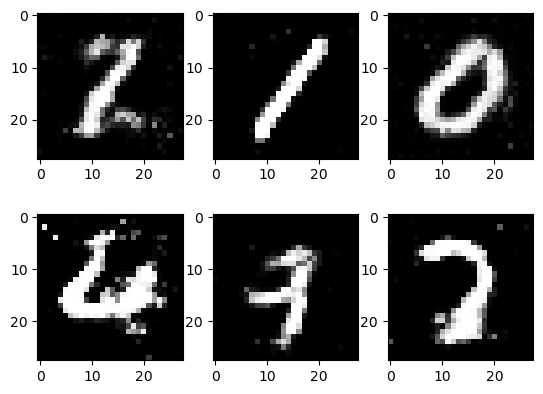

In [22]:
# Generate synthetic data
generator.eval()
z = torch.randn(64, latent_dim)
synthetic_imgs = generator(z)
synthetic_imgs = synthetic_imgs.view(synthetic_imgs.size(0), 1, 28, 28)

# Visualize the synthetic data
import matplotlib.pyplot as plt

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(synthetic_imgs[i].detach().numpy().reshape(28, 28), cmap='gray')
plt.show()
